In [7]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
from psycopg2 import OperationalError

Creating connection to Postgres data base

In [2]:
def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port,
        )
        print("Connection to PostgreSQL DB successful")
    except OperationalError as e:
        print(f"The error '{e}' occurred")
    return connection


connection = create_connection("africa", "postgres", "postgres123", "127.0.0.1", "5432")

Connection to PostgreSQL DB successful


Creating function to execute queries from PosgreSQL DB

In [3]:
def execute_query(connection, query):
    connection.autocommit = True
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Query executed successfully")
    except OperationalError as e:
        print(f"The error '{e}' occurred")

Creating dataframe to test query and check data sample

In [4]:
df = pd.read_sql_query("SELECT year, bmi_mean FROM public.bmi WHERE country = 'Algeria' and sex = 'Men'",con=connection)
df.head()

,year,bmi_mean
0,1975,21.316565
1,1976,21.393173
2,1977,21.471962
3,1978,21.552532
4,1979,21.635380


Testing line chart generation

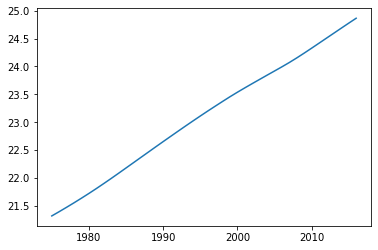

In [5]:
plt.plot(df.year, df.bmi_mean)
plt.show()

Creating function to generate line charts for 10 selected counries, per gender for BMI indicator

Nigeria Women


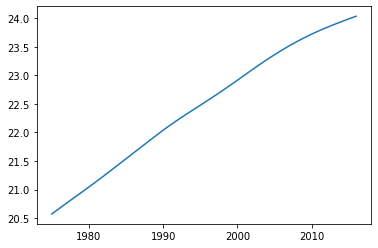

Nigeria Men


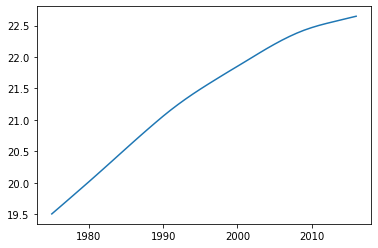

Egypt Women


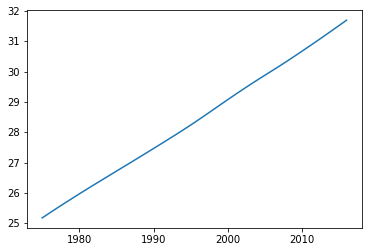

Egypt Men


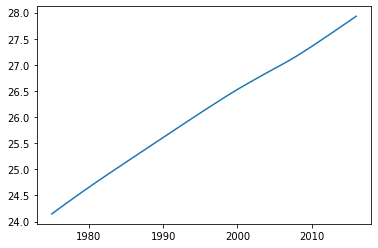

South Africa Women


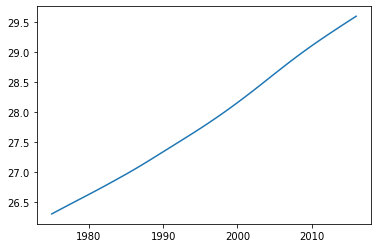

South Africa Men


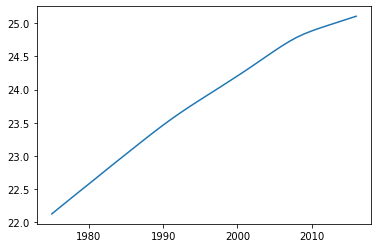

Kenya Women


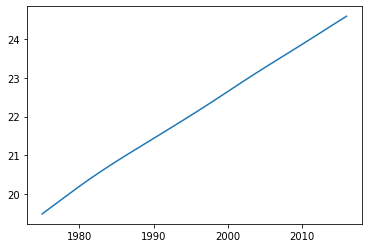

Kenya Men


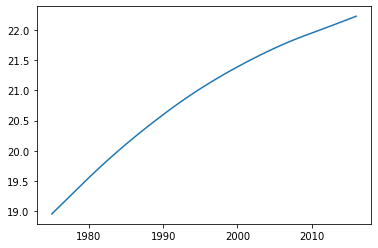

Algeria Women


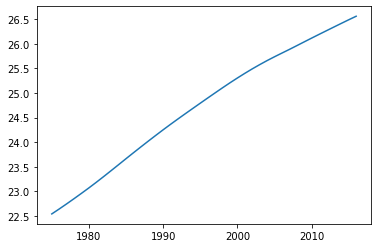

Algeria Men


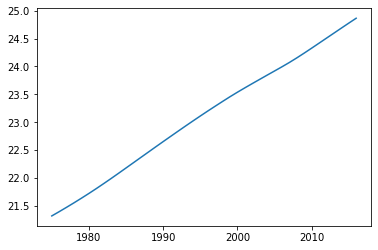

Morocco Women


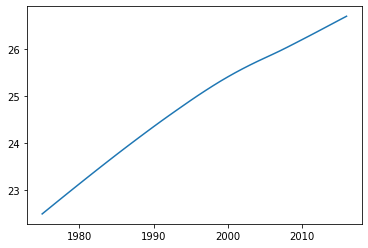

Morocco Men


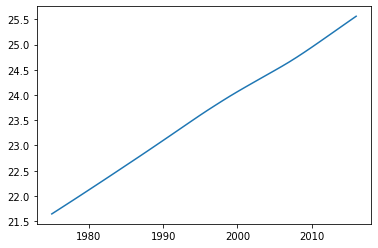

Angola Women


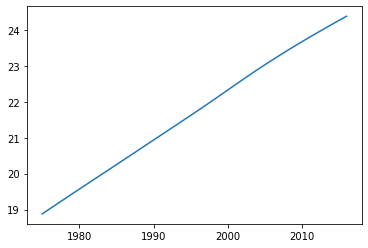

Angola Men


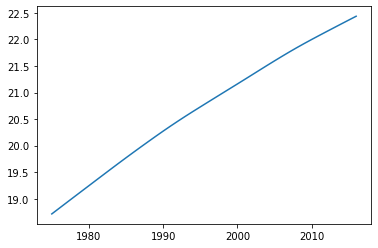

Ghana Women


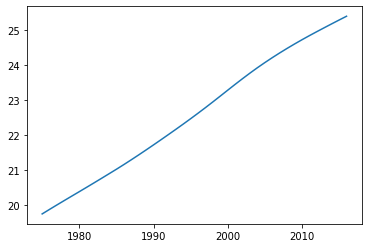

Ghana Men


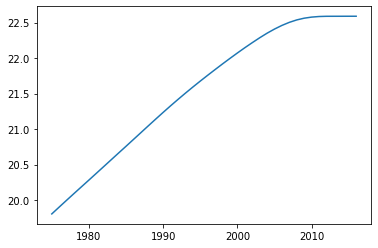

Cameroon Women


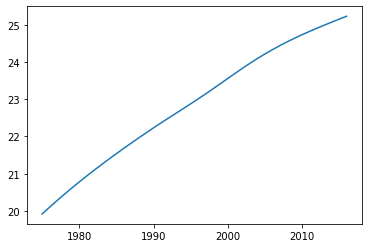

Cameroon Men


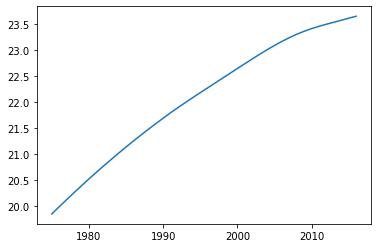

Cote d''Ivoire Women


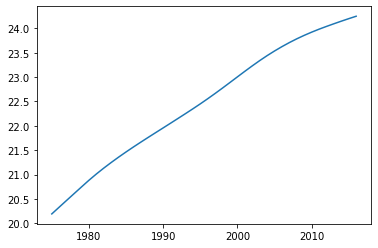

Cote d''Ivoire Men


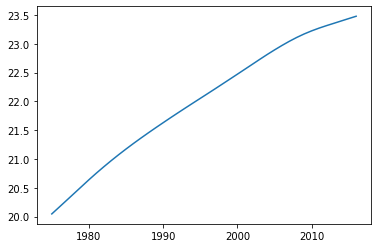

In [50]:
selection = [ 'Nigeria', 'Egypt', 'South Africa', 'Kenya', 'Algeria', 'Morocco', 'Angola', 'Ghana', 'Cameroon', "Cote d''Ivoire"]
sex = ['Women', 'Men']

for country in selection:
    for element in sex:
        print(country, element)
        query = f"SELECT year, bmi_mean FROM public.bmi WHERE country = '{country}' and sex = '{element}'"
        df = pd.read_sql_query(query, con=connection)
        plt.plot(df.year, df.bmi_mean)
        plt.show()